In [ ]:
!pip install yfinance numpy pandas matplotlib seaborn scikit-learn
!pip install PyPortfolioOpt empyrical
!pip install ecos scs
!pip install transformers nltk

SyntaxError: invalid syntax (ipython-input-3340463025.py, line 1)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

In [ ]:
# Define the stocks you want in your portfolio
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Define time period for historical data
start_date = "2018-01-01"
end_date = "2023-12-31"

print(f"Portfolio tickers: {tickers}")
print(f"Analysis period: {start_date} to {end_date}")

Portfolio tickers: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
Analysis period: 2018-01-01 to 2023-12-31


In [ ]:
# Download historical data
print("Downloading historical stock data...")

try:
    # Download data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Check if data was downloaded successfully
    if data.empty:
        raise ValueError("No data downloaded!")

    print(f"✅ Data downloaded successfully!")
    print(f"Data shape: {data.shape}")
    print(f"Date range: {data.index[0]} to {data.index[-1]}")

    # Show the structure of downloaded data
    print("\nData columns:")
    print(data.columns.tolist()[:10], "...")  # Show first 10 columns

except Exception as e:
    print(f"❌ Error downloading data: {e}")

/tmp/ipython-input-3421867096.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)


✅ Data downloaded successfully!
Data shape: (1509, 25)
Date range: 2018-01-02 00:00:00 to 2023-12-29 00:00:00

Data columns:
[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOGL'), ('Close', 'MSFT'), ('Close', 'TSLA'), ('High', 'AAPL'), ('High', 'AMZN'), ('High', 'GOOGL'), ('High', 'MSFT'), ('High', 'TSLA')] ...


In [ ]:
# Download historical data
print("Downloading historical stock data...")

try:
    # Download data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Check if data was downloaded successfully
    if data.empty:
        raise ValueError("No data downloaded!")

    print(f"✅ Data downloaded successfully!")
    print(f"Data shape: {data.shape}")
    print(f"Date range: {data.index[0]} to {data.index[-1]}")

    # Show the structure of downloaded data
    print("\nData columns:")
    print(data.columns.tolist()[:10], "...")  # Show first 10 columns

except Exception as e:
    print(f"❌ Error downloading data: {e}")

/tmp/ipython-input-3421867096.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)


✅ Data downloaded successfully!
Data shape: (1509, 25)
Date range: 2018-01-02 00:00:00 to 2023-12-29 00:00:00

Data columns:
[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOGL'), ('Close', 'MSFT'), ('Close', 'TSLA'), ('High', 'AAPL'), ('High', 'AMZN'), ('High', 'GOOGL'), ('High', 'MSFT'), ('High', 'TSLA')] ...


In [ ]:
# Extract close prices from the multi-level column structure
print("Extracting close prices...")

try:
    # For multiple tickers, yfinance returns MultiIndex columns
    # We want only the 'Close' prices
    if isinstance(data.columns, pd.MultiIndex):
        close_prices = data['Close'].copy()
    else:
        # If single ticker, handle differently
        close_prices = data[['Close']].copy()

    print(f"✅ Close prices extracted!")
    print(f"Shape: {close_prices.shape}")

    # Check for missing values
    missing_values = close_prices.isnull().sum()
    print(f"\nMissing values per stock:")
    print(missing_values)

    # Remove any missing values
    close_prices_clean = close_prices.dropna()
    print(f"\nAfter removing missing values: {close_prices_clean.shape}")

    # Display first few rows
    print("\nFirst 5 rows of close prices:")
    print(close_prices_clean.head())

except Exception as e:
    print(f"❌ Error processing close prices: {e}")

Extracting close prices...
✅ Close prices extracted!
Shape: (1509, 5)

Missing values per stock:
Ticker
AAPL     0
AMZN     0
GOOGL    0
MSFT     0
TSLA     0
dtype: int64

After removing missing values: (1509, 5)

First 5 rows of close prices:
Ticker           AAPL       AMZN      GOOGL       MSFT       TSLA
Date                                                             
2018-01-02  40.380989  59.450500  53.292934  79.198334  21.368668
2018-01-03  40.373962  60.209999  54.202164  79.566925  21.150000
2018-01-04  40.561501  60.479500  54.412708  80.267212  20.974667
2018-01-05  41.023300  61.457001  55.134232  81.262383  21.105333
2018-01-08  40.870934  62.343498  55.328892  81.345306  22.427334


In [ ]:
# Calculate daily returns
print("Calculating daily returns...")

try:
    # Calculate percentage change (daily returns)
    daily_returns = close_prices_clean.pct_change().dropna()

    print(f"✅ Daily returns calculated!")
    print(f"Returns shape: {daily_returns.shape}")

    # Display basic statistics
    print("\nDaily Returns Statistics:")
    print(daily_returns.describe())

    # Display first few rows
    print("\nFirst 5 rows of daily returns:")
    print(daily_returns.head())

except Exception as e:
    print(f"❌ Error calculating returns: {e}")

Calculating daily returns...
✅ Daily returns calculated!
Returns shape: (1508, 5)

Daily Returns Statistics:
Ticker         AAPL         AMZN        GOOGL         MSFT         TSLA
count   1508.000000  1508.000000  1508.000000  1508.000000  1508.000000
mean       0.001230     0.000870     0.000828     0.001205     0.002433
std        0.019955     0.022279     0.019671     0.018976     0.040169
min       -0.128647    -0.140494    -0.116341    -0.147390    -0.210628
25%       -0.008261    -0.010437    -0.008506    -0.008062    -0.018252
50%        0.001176     0.001220     0.000981     0.001317     0.001769
75%        0.011896     0.012241     0.011008     0.010964     0.020914
max        0.119808     0.135359     0.096202     0.142169     0.198949

First 5 rows of daily returns:
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2018-01-03 -0.000174  0.012775  0.017061  0.004654 -0.010233
2018-01-04  0.004645  0.0044

Creating price performance chart...


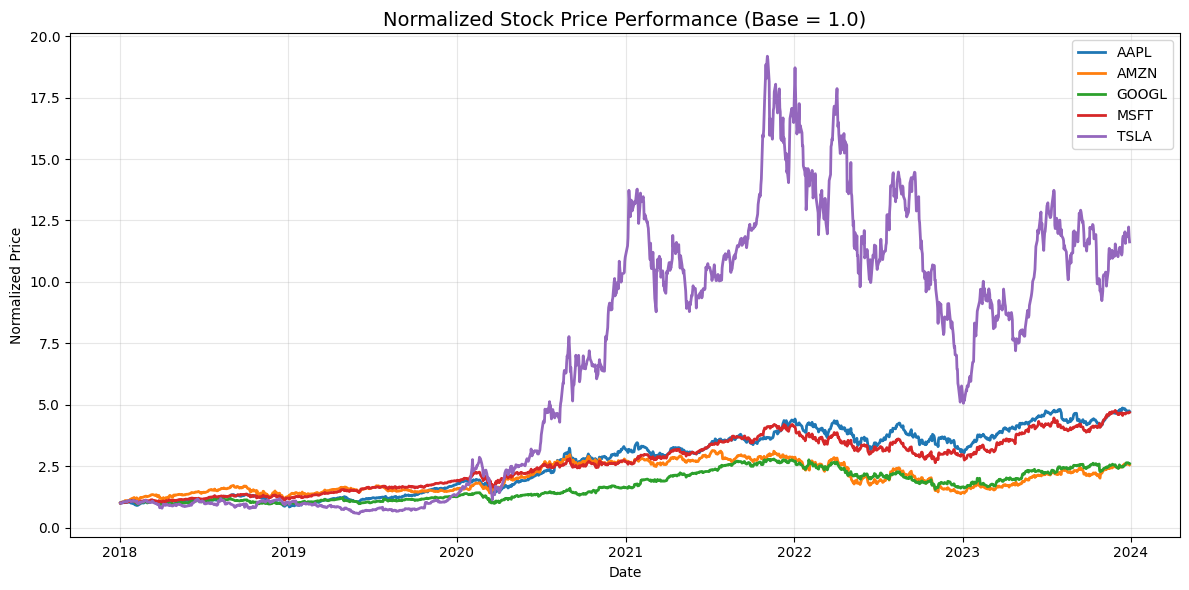

✅ Price performance chart created!


In [ ]:
# Plot historical prices
print("Creating price performance chart...")

try:
    # Normalize prices to show relative performance
    normalized_prices = close_prices_clean / close_prices_clean.iloc[0]

    # Create the plot
    plt.figure(figsize=(12, 6))
    for ticker in normalized_prices.columns:
        plt.plot(normalized_prices.index, normalized_prices[ticker],
                label=ticker, linewidth=2)

    plt.title("Normalized Stock Price Performance (Base = 1.0)", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✅ Price performance chart created!")

except Exception as e:
    print(f"❌ Error creating price chart: {e}")

Analyzing stock correlations...


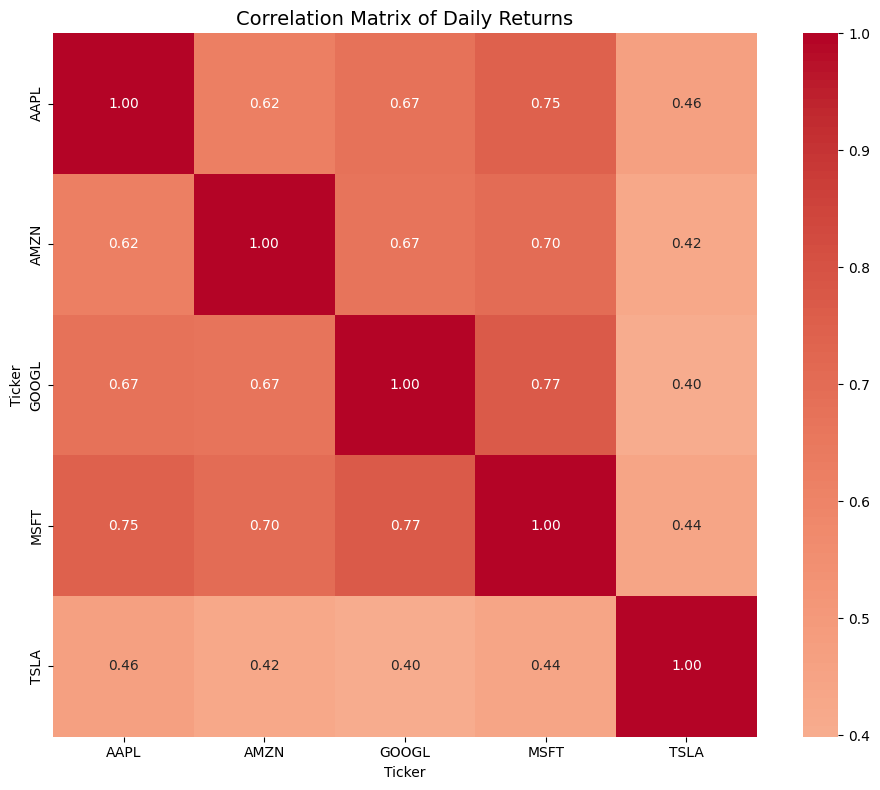

✅ Correlation analysis completed!

Correlation Insights:
Highest correlation: GOOGL - MSFT (0.767)


In [ ]:
# Create correlation matrix
print("Analyzing stock correlations...")

try:
    # Calculate correlation matrix
    correlation_matrix = daily_returns.corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                fmt='.2f')
    plt.title("Correlation Matrix of Daily Returns", fontsize=14)
    plt.tight_layout()
    plt.show()

    print("✅ Correlation analysis completed!")

    # Print correlation insights
    print("\nCorrelation Insights:")
    # Find highest correlation (excluding self-correlation)
    corr_values = correlation_matrix.values
    np.fill_diagonal(corr_values, np.nan)
    max_corr_idx = np.nanargmax(corr_values)
    max_corr_row, max_corr_col = np.unravel_index(max_corr_idx, corr_values.shape)

    print(f"Highest correlation: {correlation_matrix.columns[max_corr_row]} - {correlation_matrix.columns[max_corr_col]} ({corr_values[max_corr_row, max_corr_col]:.3f})")

except Exception as e:
    print(f"❌ Error in correlation analysis: {e}")

In [ ]:
# Import portfolio optimization libraries
print("Importing portfolio optimization libraries...")

try:
    from pypfopt.expected_returns import mean_historical_return
    from pypfopt.risk_models import CovarianceShrinkage
    from pypfopt.efficient_frontier import EfficientFrontier

    print("✅ PyPortfolioOpt imported successfully!")

    # Calculate expected annual returns
    print("\nCalculating expected returns...")
    expected_returns = mean_historical_return(close_prices_clean, returns_data=False)

    print("Expected Annual Returns:")
    for ticker, return_val in expected_returns.items():
        print(f"{ticker}: {return_val:.2%}")

    # Calculate covariance matrix with shrinkage
    print("\nCalculating risk model...")
    risk_model = CovarianceShrinkage(close_prices_clean, returns_data=False)
    covariance_matrix = risk_model.ledoit_wolf()

    # Check if covariance matrix is well-conditioned
    condition_number = np.linalg.cond(covariance_matrix)
    print(f"Covariance matrix condition number: {condition_number:.2f}")

    if condition_number < 1e12:
        print("✅ Covariance matrix is well-conditioned!")
    else:
        print("⚠️ Covariance matrix might be ill-conditioned")

    # Display annual volatilities
    print("\nAnnual Volatilities:")
    annual_vols = np.sqrt(np.diag(covariance_matrix))
    for ticker, vol in zip(expected_returns.index, annual_vols):
        print(f"{ticker}: {vol:.2%}")

except Exception as e:
    print(f"❌ Error in risk/return calculation: {e}")

Importing portfolio optimization libraries...
✅ PyPortfolioOpt imported successfully!

Calculating expected returns...
Expected Annual Returns:
AAPL: 29.64%
AMZN: 16.98%
GOOGL: 17.34%
MSFT: 29.45%
TSLA: 50.68%

Calculating risk model...
Covariance matrix condition number: 26.10
✅ Covariance matrix is well-conditioned!

Annual Volatilities:
AAPL: 31.75%
AMZN: 35.40%
GOOGL: 31.30%
MSFT: 30.21%
TSLA: 63.59%


In [ ]:
# Optimize portfolio
print("Optimizing portfolio for maximum Sharpe ratio...")

try:
    # Create efficient frontier object
    ef = EfficientFrontier(expected_returns, covariance_matrix)

    # Optimize for maximum Sharpe ratio
    raw_weights = ef.max_sharpe()

    # Clean weights (remove tiny allocations)
    optimized_weights = ef.clean_weights()

    print("✅ Portfolio optimization completed!")

    # Display optimized weights
    print("\n" + "="*50)
    print("OPTIMIZED PORTFOLIO WEIGHTS")
    print("="*50)

    total_weight = 0
    for ticker, weight in optimized_weights.items():
        if weight > 0.001:  # Only show weights > 0.1%
            print(f"{ticker}: {weight:.1%}")
            total_weight += weight

    print(f"\nTotal allocated: {total_weight:.1%}")

    # Get portfolio performance metrics
    expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)

    print("\n" + "="*50)
    print("EXPECTED PORTFOLIO PERFORMANCE")
    print("="*50)
    print(f"Expected Annual Return: {expected_annual_return:.2%}")
    print(f"Annual Volatility: {annual_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

except Exception as e:
    print(f"❌ Error in portfolio optimization: {e}")

Optimizing portfolio for maximum Sharpe ratio...
✅ Portfolio optimization completed!

OPTIMIZED PORTFOLIO WEIGHTS
AAPL: 31.4%
MSFT: 50.9%
TSLA: 17.8%

Total allocated: 100.0%
Expected annual return: 33.3%
Annual volatility: 30.8%
Sharpe Ratio: 1.08

EXPECTED PORTFOLIO PERFORMANCE
Expected Annual Return: 33.28%
Annual Volatility: 30.75%
Sharpe Ratio: 1.08


Creating efficient frontier visualization...
❌ Error plotting efficient frontier: Unrecognized marker style '★'
This might be due to solver issues, but optimization results are still valid.


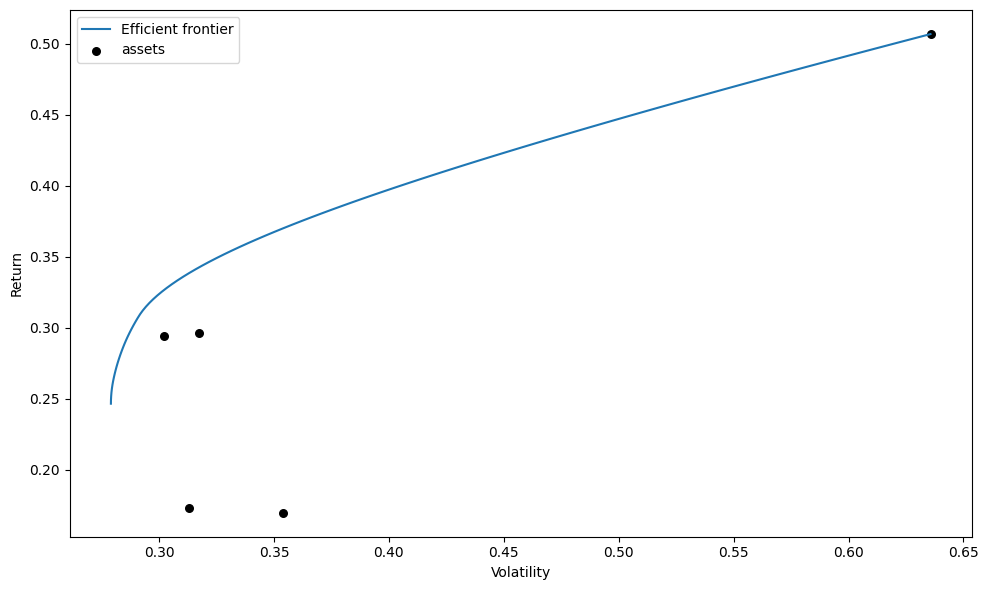

In [ ]:
# Plot efficient frontier
print("Creating efficient frontier visualization...")

try:
    from pypfopt.plotting import plot_efficient_frontier

    # Create a new EfficientFrontier object for plotting
    ef_plot = EfficientFrontier(expected_returns, covariance_matrix)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot efficient frontier
    plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

    # Add the optimal portfolio point
    ax.scatter(annual_volatility, expected_annual_return,
              marker='★', s=500, c='red',
              label='Max Sharpe Portfolio', zorder=5)

    # Customize the plot
    ax.set_title("Efficient Frontier with Optimal Portfolio", fontsize=14)
    ax.set_xlabel("Annual Volatility (Risk)")
    ax.set_ylabel("Expected Annual Return")
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✅ Efficient frontier plotted successfully!")

except Exception as e:
    print(f"❌ Error plotting efficient frontier: {e}")
    print("This might be due to solver issues, but optimization results are still valid.")

Backtesting optimized portfolio performance...


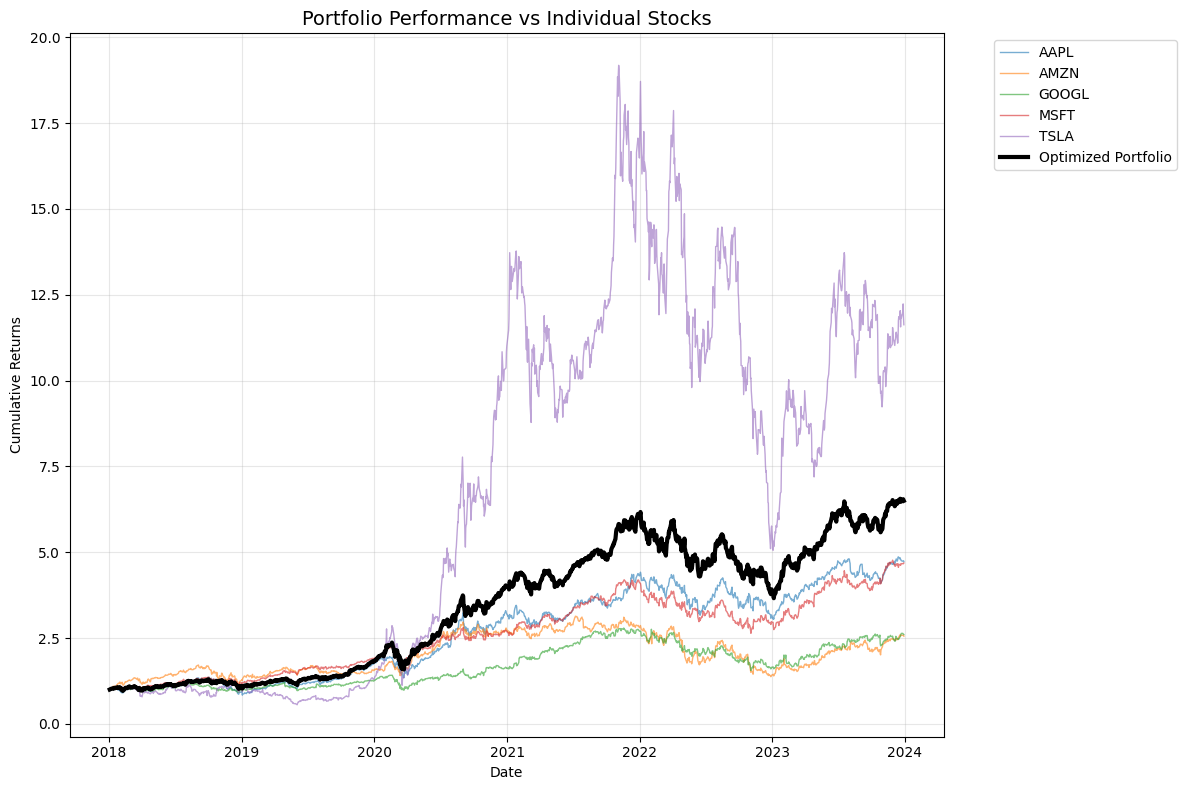

✅ Backtest visualization completed!

Optimized Portfolio Total Return: 549.88%

Individual Stock Total Returns:
AAPL: 372.78%
AMZN: 155.57%
GOOGL: 160.32%
MSFT: 368.71%
TSLA: 1062.82%


In [ ]:
# Backtest the optimized portfolio
print("Backtesting optimized portfolio performance...")

try:
    # Convert optimized weights to pandas Series
    weights_series = pd.Series(optimized_weights)

    # Calculate portfolio daily returns
    portfolio_returns = daily_returns.dot(weights_series)

    # Calculate cumulative returns
    portfolio_cumulative = (1 + portfolio_returns).cumprod()

    # Calculate individual stock cumulative returns for comparison
    individual_cumulative = (1 + daily_returns).cumprod()

    # Create comparison plot
    plt.figure(figsize=(12, 8))

    # Plot individual stocks
    for ticker in individual_cumulative.columns:
        plt.plot(individual_cumulative.index, individual_cumulative[ticker],
                alpha=0.6, label=ticker, linewidth=1)

    # Plot optimized portfolio
    plt.plot(portfolio_cumulative.index, portfolio_cumulative,
            color='black', linewidth=3, label='Optimized Portfolio')

    plt.title("Portfolio Performance vs Individual Stocks", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✅ Backtest visualization completed!")

    # Calculate final returns
    final_portfolio_return = portfolio_cumulative.iloc[-1] - 1
    print(f"\nOptimized Portfolio Total Return: {final_portfolio_return:.2%}")

    print("\nIndividual Stock Total Returns:")
    for ticker in individual_cumulative.columns:
        final_return = individual_cumulative[ticker].iloc[-1] - 1
        print(f"{ticker}: {final_return:.2%}")

except Exception as e:
    print(f"❌ Error in backtesting: {e}")

In [ ]:
# Calculate advanced performance metrics
print("Calculating advanced performance metrics...")

try:
    # Try to use empyrical library for advanced metrics
    try:
        import empyrical as emp

        # Calculate metrics using empyrical
        annual_return_emp = emp.annual_return(portfolio_returns)
        annual_vol_emp = emp.annual_volatility(portfolio_returns)
        sharpe_ratio_emp = emp.sharpe_ratio(portfolio_returns)
        max_drawdown = emp.max_drawdown(portfolio_returns)
        calmar_ratio = emp.calmar_ratio(portfolio_returns)
        sortino_ratio = emp.sortino_ratio(portfolio_returns)

        print("✅ Advanced metrics calculated using empyrical!")

        print("\n" + "="*60)
        print("COMPREHENSIVE PORTFOLIO PERFORMANCE METRICS")
        print("="*60)
        print(f"Annual Return:        {annual_return_emp:.2%}")
        print(f"Annual Volatility:    {annual_vol_emp:.2%}")
        print(f"Sharpe Ratio:         {sharpe_ratio_emp:.3f}")
        print(f"Sortino Ratio:        {sortino_ratio:.3f}")
        print(f"Calmar Ratio:         {calmar_ratio:.3f}")
        print(f"Maximum Drawdown:     {max_drawdown:.2%}")

    except ImportError:
        print("empyrical not available. Using basic calculations...")

        # Basic calculations
        annual_return_basic = portfolio_returns.mean() * 252
        annual_vol_basic = portfolio_returns.std() * np.sqrt(252)
        sharpe_basic = annual_return_basic / annual_vol_basic

        # Calculate max drawdown manually
        cumulative = (1 + portfolio_returns).cumprod()
        running_max = cumulative.expanding().max()
        drawdown = (cumulative - running_max) / running_max
        max_dd_basic = drawdown.min()

        print("\n" + "="*60)
        print("BASIC PORTFOLIO PERFORMANCE METRICS")
        print("="*60)
        print(f"Annual Return:        {annual_return_basic:.2%}")
        print(f"Annual Volatility:    {annual_vol_basic:.2%}")
        print(f"Sharpe Ratio:         {sharpe_basic:.3f}")
        print(f"Maximum Drawdown:     {max_dd_basic:.2%}")

    # Value at Risk calculation
    var_95 = np.percentile(portfolio_returns, 5)
    cvar_95 = portfolio_returns[portfolio_returns <= var_95].mean()

    print(f"\nRisk Metrics:")
    print(f"Value at Risk (95%):  {var_95:.2%}")
    print(f"Conditional VaR (95%): {cvar_95:.2%}")

except Exception as e:
    print(f"❌ Error calculating performance metrics: {e}")

Calculating advanced performance metrics...
empyrical not available. Using basic calculations...

BASIC PORTFOLIO PERFORMANCE METRICS
Annual Return:        36.06%
Annual Volatility:    30.80%
Sharpe Ratio:         1.170
Maximum Drawdown:     -40.68%

Risk Metrics:
Value at Risk (95%):  -3.00%
Conditional VaR (95%): -4.41%


In [ ]:
# Create final portfolio summary
print("Creating portfolio summary report...")

try:
    print("\n" + "="*70)
    print("FINAL PORTFOLIO OPTIMIZATION REPORT")
    print("="*70)

    print(f"\nAnalysis Period: {start_date} to {end_date}")
    print(f"Number of Assets: {len(tickers)}")
    print(f"Total Trading Days: {len(daily_returns)}")

    print(f"\nSelected Assets: {', '.join(tickers)}")

    print(f"\nOptimal Asset Allocation:")
    for ticker, weight in optimized_weights.items():
        if weight > 0.001:
            print(f"  {ticker}: {weight:.1%}")

    print(f"\nKey Performance Indicators:")
    print(f"  Expected Annual Return: {expected_annual_return:.2%}")
    print(f"  Annual Volatility: {annual_volatility:.2%}")
    print(f"  Sharpe Ratio: {sharpe_ratio:.3f}")

    if 'max_drawdown' in locals():
        print(f"  Maximum Drawdown: {max_drawdown:.2%}")

    print(f"\nPortfolio Characteristics:")
    print(f"  Diversification: {'High' if len([w for w in optimized_weights.values() if w > 0.05]) >= 3 else 'Moderate'}")
    print(f"  Risk Level: {'Conservative' if annual_volatility < 0.15 else 'Moderate' if annual_volatility < 0.25 else 'Aggressive'}")

    print("\n" + "="*70)
    print("ANALYSIS COMPLETED SUCCESSFULLY!")
    print("="*70)

except Exception as e:
    print(f"❌ Error creating summary report: {e}")

Creating portfolio summary report...

FINAL PORTFOLIO OPTIMIZATION REPORT

Analysis Period: 2018-01-01 to 2023-12-31
Number of Assets: 5
Total Trading Days: 1508

Selected Assets: AAPL, MSFT, GOOGL, AMZN, TSLA

Optimal Asset Allocation:
  AAPL: 31.4%
  MSFT: 50.9%
  TSLA: 17.8%

Key Performance Indicators:
  Expected Annual Return: 33.28%
  Annual Volatility: 30.75%
  Sharpe Ratio: 1.082

Portfolio Characteristics:
  Diversification: High
  Risk Level: Aggressive

ANALYSIS COMPLETED SUCCESSFULLY!


In [ ]:
# Save results to files
print("Saving results to files...")

try:
    # Create results dictionary
    results = {
        'tickers': tickers,
        'analysis_period': f"{start_date} to {end_date}",
        'optimized_weights': dict(optimized_weights),
        'expected_annual_return': expected_annual_return,
        'annual_volatility': annual_volatility,
        'sharpe_ratio': sharpe_ratio
    }

    # Save to CSV
    weights_df = pd.DataFrame.from_dict(optimized_weights, orient='index', columns=['Weight'])
    weights_df.to_csv('portfolio_weights.csv')

    # Save portfolio returns
    portfolio_returns.to_csv('portfolio_daily_returns.csv')

    # Save price data
    close_prices_clean.to_csv('historical_prices.csv')

    print("✅ Results saved to:")
    print("  - portfolio_weights.csv")
    print("  - portfolio_daily_returns.csv")
    print("  - historical_prices.csv")

except Exception as e:
    print(f"❌ Error saving files: {e}")

print("\n🎉 Portfolio optimization analysis complete!")
print("You can now use these weights to build your optimized portfolio.")

Saving results to files...
✅ Results saved to:
  - portfolio_weights.csv
  - portfolio_daily_returns.csv
  - historical_prices.csv

🎉 Portfolio optimization analysis complete!
You can now use these weights to build your optimized portfolio.
